Here we have a few plotting functions to visualize clusters of data and the result of clustering algorithms.

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib.cm import get_cmap
import pandas as pd
from scipy.spatial import ConvexHull
from sklearn.datasets.samples_generator import make_blobs

In [2]:
def draw_clusters(points, cluster_ids):
    # Setup a figure and axes
    fig = plt.figure(figsize=(6,6))
    ax = plt.subplot(111)

    # Get a colormap
    cmap = get_cmap('Set1')
    cluster_ids_set = set(cluster_ids) - set([-1])
    # Get a multiplier to fully span range of colors in colormap
    cmap_mult = 1
    if cluster_ids_set:
        cmap_mult = 1/len(cluster_ids_set)

    for i, cid in enumerate(cluster_ids_set):
        _df = df[cluster_ids==cid]
        color = cmap(i*cmap_mult)
        _df.plot.scatter(x='x', y='y', ax=ax, color=color)
        ch = ConvexHull(_df)
        hull_pts = _df.iloc[ch.vertices]
        hull_color = color[:3] + (.3,) # Decrease opacity
        ax.fill(hull_pts.x, hull_pts.y, color=hull_color)
    
    if -1 in cluster_ids:
        _df = df[cluster_ids==-1]
        _df.plot.scatter(x='x', y='y', ax=ax, color='black')

    ax.grid(True)

## Generate some points

In [9]:
# Generate some points
points, cluster_ids = make_blobs(
    n_samples=100, centers=[[0, 0], [0, 1], [1, 1]], cluster_std=0.2)
df = pd.DataFrame.from_records(points, columns=['x', 'y'])

## Visualize generating clusters

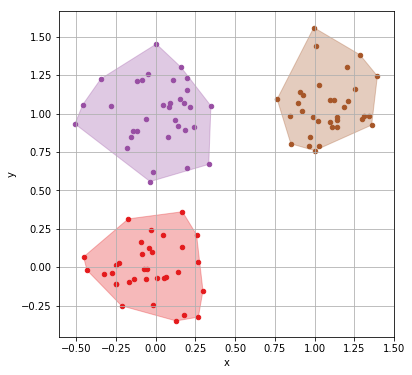

In [10]:
draw_clusters(points, cluster_ids)

## Visualize DBSCAN clusters

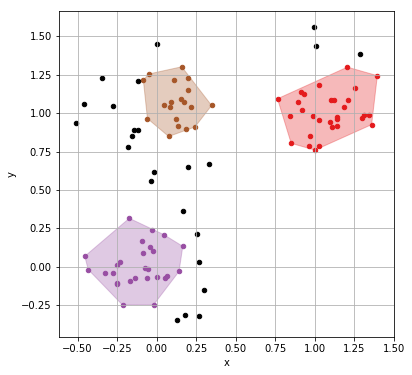

In [11]:
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=0.2, min_samples=10).fit(points)
draw_clusters(points, db.labels_)